In [12]:
import glob
import os
import pandas as pd
import matplotlib.image as mpimg

In [13]:
import platform
platform.system()

if platform.system() == 'Darwin':
    is_mac = True

In [14]:
if not is_mac:
    !pip install pycaret

In [15]:
if not is_mac:
    from google.colab import drive
    drive.mount('/content/gdrive')

In [16]:
if is_mac:
    image_path = '/Users/Mark/fruitpunch/coral_detection/data/'
    annot_path = image_path
else:
    image_path = '/content/gdrive/MyDrive/Reef Support Benthic Data/SEAVIEW/PAC_AUS/'
    annot_path = '/content/gdrive/MyDrive/Reef Support Benthic Data/SEAVIEW/tabular-data/'

In [17]:
image_files = glob.glob(image_path + 11*'?' + '.jpg')

In [18]:
annot_file = 'annotations_PAC_AUS.csv'
df = pd.read_csv(annot_path + annot_file, index_col=0)
df.shape

(186420, 7)

In [19]:
ids = [int(os.path.basename(fname).rstrip('.jpg')) for fname in image_files]
df = df.loc[ids]
df.shape

(1380, 7)

In [20]:
df[['r','g','b']] = int(0)

for ctr, image_file in enumerate(image_files):
    id = int(os.path.basename(image_file).rstrip('.jpg'))
    #print(image_file, id)
    img = mpimg.imread(image_file)
    df.loc[id,['r','g','b']] = img[df.loc[id]['x'], df.loc[id]['y'], :] 
    print(f'{ctr+1}/{len(image_files)}',end='\r')

In [21]:
df.head()

,y,x,label_name,label,func_group,method,data_set,r,g,b
quadratid,,,,,,,,,,
45026223001,73,95,Epilithic Algal Matrix,Unc,Algae,random,test,29,15,32
45026223001,140,65,Epilithic Algal Matrix,Unc,Algae,random,test,31,8,28
45026223001,66,182,Epilithic Algal Matrix,Unc,Algae,random,test,55,48,99
45026223001,201,216,Poritidae massive,POR-MASS,Hard Coral,random,test,176,171,201
45026223001,137,340,Poritidae massive,POR-MASS,Hard Coral,random,test,218,225,217


In [22]:
df['is_coral'] = df['func_group'].str.contains('Coral')

In [23]:
df.reset_index(inplace=True)

In [24]:
df.drop(columns=['quadratid','y','x','label_name','label','func_group','method','data_set'], inplace=True)

In [25]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1311, 4)
Unseen Data For Predictions: (69, 4)


In [26]:
from pycaret.classification import *

In [28]:
pyc = setup(data=data, target='is_coral', session_id=123, silent=True)

,Description,Value
0,session_id,123
1,Target,is_coral
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(1311, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6707,0.7319,0.5866,0.6379,0.6086,0.3258,0.3283,0.1380
qda,Quadratic Discriminant Analysis,0.6653,0.7215,0.6040,0.6263,0.6132,0.3189,0.3203,0.0070
lightgbm,Light Gradient Boosting Machine,0.6630,0.6906,0.5816,0.6285,0.6016,0.3109,0.3134,0.0300
knn,K Neighbors Classifier,0.6619,0.7065,0.6037,0.6203,0.6107,0.3122,0.3131,0.0140
et,Extra Trees Classifier,0.6609,0.7364,0.5793,0.6266,0.5998,0.3067,0.3092,0.1270
gbc,Gradient Boosting Classifier,0.6510,0.7124,0.5198,0.6270,0.5652,0.2789,0.2838,0.0420
ada,Ada Boost Classifier,0.6204,0.6368,0.4601,0.5903,0.5145,0.2115,0.2171,0.0500
dt,Decision Tree Classifier,0.6096,0.6070,0.5843,0.5564,0.5680,0.2128,0.2144,0.0080
nb,Naive Bayes,0.5594,0.5581,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
lr,Logistic Regression,0.5278,0.5908,0.1259,0.3735,0.1863,-0.0327,-0.0470,0.4520


In [30]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [31]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6522,0.7204,0.5750,0.6053,0.5897,0.2882,0.2885
1,0.6196,0.6375,0.4250,0.5862,0.4928,0.2006,0.2072
2,0.6739,0.7312,0.5750,0.6389,0.6053,0.3288,0.3301
3,0.7174,0.7781,0.7073,0.6744,0.6905,0.4307,0.4312
4,0.7500,0.8233,0.6341,0.7647,0.6933,0.4854,0.4915
5,0.6630,0.7202,0.4878,0.6667,0.5634,0.2996,0.3093
6,0.6087,0.7083,0.5366,0.5641,0.5500,0.2042,0.2044
7,0.6593,0.7125,0.6250,0.6098,0.6173,0.3104,0.3105
8,0.6813,0.7588,0.6750,0.6279,0.6506,0.3584,0.3592
9,0.6813,0.7284,0.6250,0.6410,0.6329,0.3514,0.3515


In [32]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [33]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6522,0.6736,0.2500,0.8333,0.3846,0.2301,0.3114
1,0.6304,0.5784,0.1500,1.0000,0.2609,0.1663,0.3012
2,0.5761,0.6197,0.1500,0.5455,0.2353,0.0588,0.0823
3,0.6413,0.7071,0.2195,0.9000,0.3529,0.2159,0.3192
4,0.6196,0.6492,0.1707,0.8750,0.2857,0.1641,0.2666
5,0.6413,0.6576,0.2683,0.7857,0.4000,0.2239,0.2899
6,0.5870,0.6148,0.1220,0.7143,0.2083,0.0901,0.1551
7,0.5385,0.6096,0.1500,0.4286,0.2222,-0.0074,-0.0094
8,0.6593,0.6782,0.3500,0.7368,0.4746,0.2671,0.3077
9,0.6593,0.6855,0.4000,0.6957,0.5079,0.2754,0.3001


In [34]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warni

/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/Mark/opt/miniconda3/envs/pycarrot/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warni

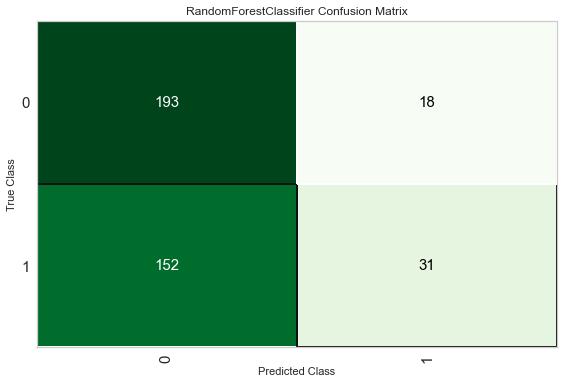

In [35]:
plot_model(tuned_rf, plot = 'confusion_matrix')

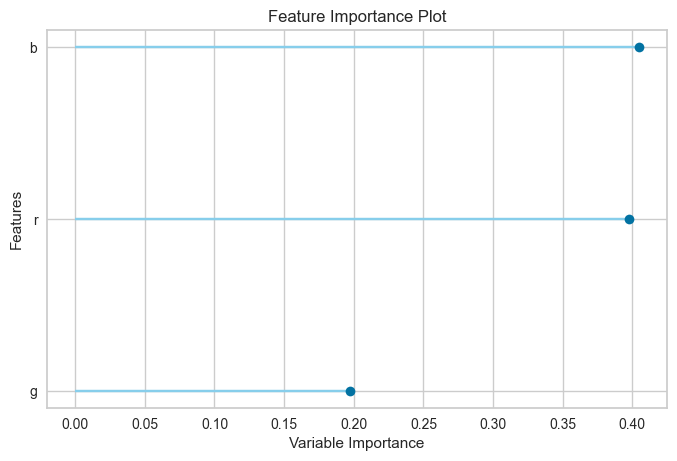

In [36]:
plot_model(tuned_rf, plot='feature')

In [37]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5685,0.6210,0.1694,0.6327,0.2672,0.0884,0.1271
